In [412]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, precision_score,f1_score
from imblearn.metrics import sensitivity_score
from sklearn.neural_network import MLPClassifier



In [330]:
# Load the CSV file
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the DataFrame
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [332]:
# Understand the Data Structure
# Check the shape of the DataFrame: Use `df.info()` to get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [334]:
# get descriptive statistics for numerical columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


To identify the outlier, we use IQR method IQR (Q3 - Q1). The outliers are typically defined as points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

Pregnancies: IQR = 6-1 = 5
1-1.5*5 = -6.5, 6+1.5*5 = 13.5

Glucose: IQR = 140.25-99 = 41.25
99-1.5*41.25 = 37.125, 140.25+1.5*41.25 = 202.125

BloodPressure: IQR = 80-62 = 18
62-1.5*18 = 35, 80+1.5*18 = 107

SkinThickness: IQR = 32-0 = 32
0-1.5*32 = -48, 32+1.5*32 = 80

Insulin: IQR = 127.25-0 = 127.25
0-1.5*127.25 = -190.875, 127.25+1.5*127.25 = 318.125

BMI: IQR = 36.6-27.3 = 9.3
27.3-1.5*9.3 = 13.35, 36.6+1.5*9.3 = 50.55

DiabetesPedigreeFunction: IQR = 0.626250-0.243750 = 0.3825
0.243750-1.5*0.3825 = -0.33, 0.626250+1.5*0.3825 = 1.2

Age: IQR = 41-24 = 17
24-1.5*17 = -1.5, 41+1.5*17 = 66.5

In [336]:
# data cleaning
# checking missing data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [338]:
# check the duplicate data
df.duplicated().sum()

0

In [340]:
df = df[(df['Pregnancies'] >= -6.5) & (df['Pregnancies'] <= 13.5)]
df = df[(df['Glucose'] >= 37.125) & (df['Glucose'] <= 202.125)]
df = df[(df['BloodPressure'] >= 35) & (df['BloodPressure'] <= 107)]
df = df[(df['SkinThickness'] >= -48) & (df['SkinThickness'] <= 80)]
df = df[(df['Insulin'] >= -190.875) & (df['Insulin'] <= 318.125)]
df = df[(df['BMI'] >= 13.35) & (df['BMI'] <= 50.55)]
df = df[(df['DiabetesPedigreeFunction'] >= -0.33) & (df['DiabetesPedigreeFunction'] <= 1.2)]
df = df[(df['Age'] >= -1.5) & (df['Age'] <= 66.5)]

In [342]:
pregnancies = df['Pregnancies']
glucose = df['Glucose']
bloodPressure = df['BloodPressure']
skinThickness = df['SkinThickness']
insulin = df['Insulin']
bmi = df['BMI']
diabetesPedigreeFunction = df['DiabetesPedigreeFunction']
age = df['Age']
outcome = df['Outcome']

In [344]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               639 non-null    int64  
 1   Glucose                   639 non-null    int64  
 2   BloodPressure             639 non-null    int64  
 3   SkinThickness             639 non-null    int64  
 4   Insulin                   639 non-null    int64  
 5   BMI                       639 non-null    float64
 6   DiabetesPedigreeFunction  639 non-null    float64
 7   Age                       639 non-null    int64  
 8   Outcome                   639 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.9 KB


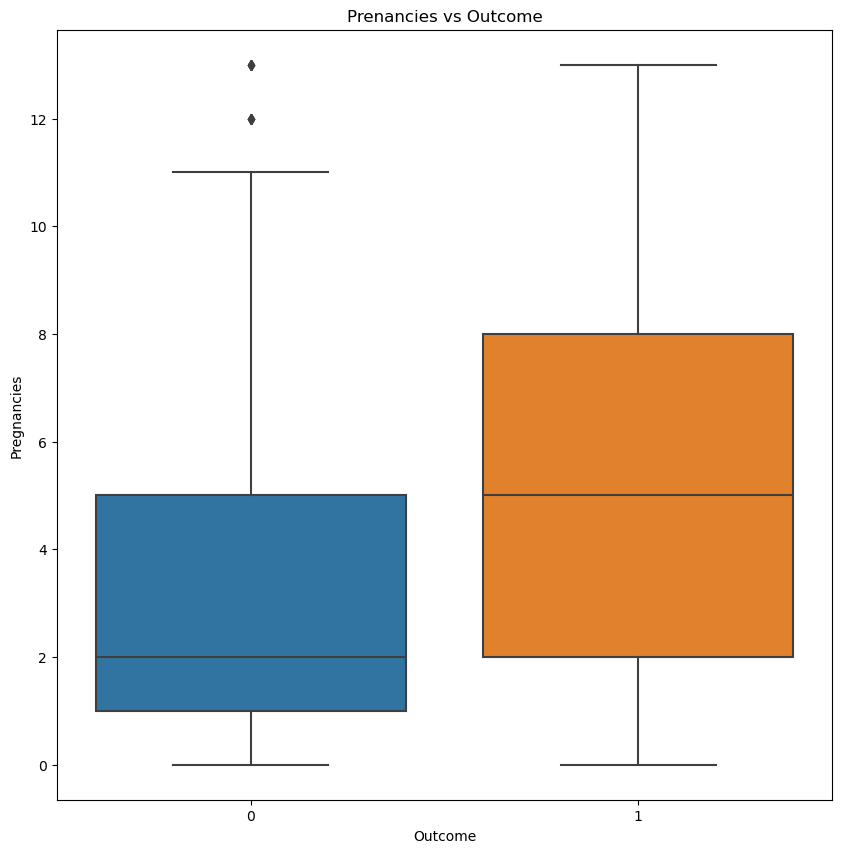

In [348]:
plt.figure(figsize=(10,10))
sns.boxplot(x=outcome, y=pregnancies, data=df)
plt.title('Prenancies vs Outcome')
plt.show()

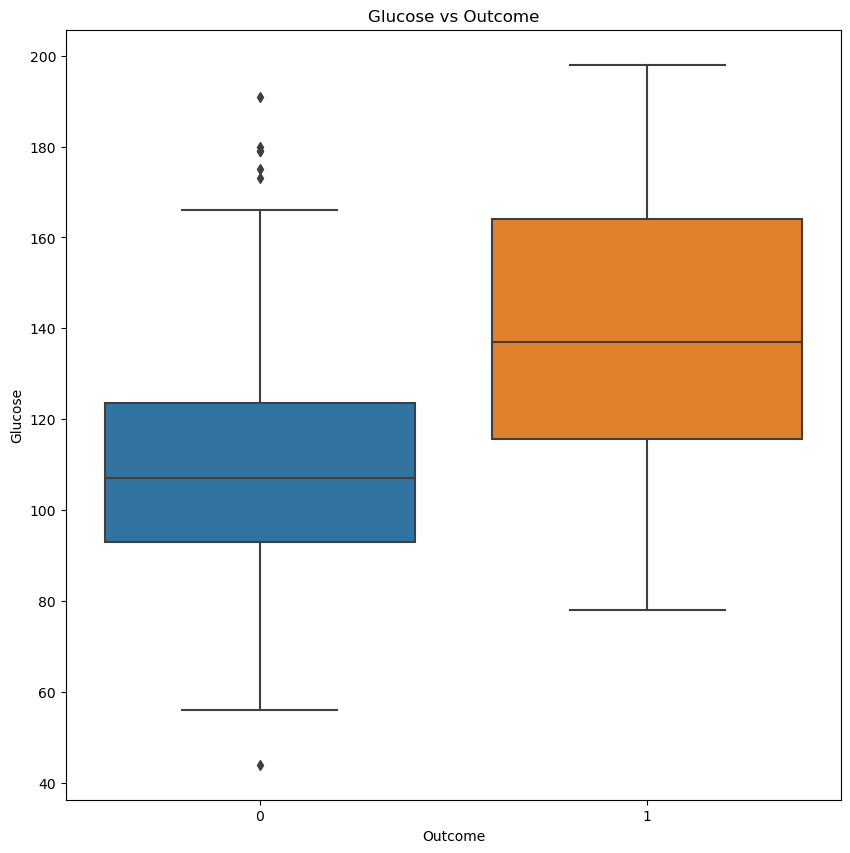

In [350]:
plt.figure(figsize=(10,10))
sns.boxplot(x=outcome, y=glucose, data=df)
plt.title('Glucose vs Outcome')
plt.show()

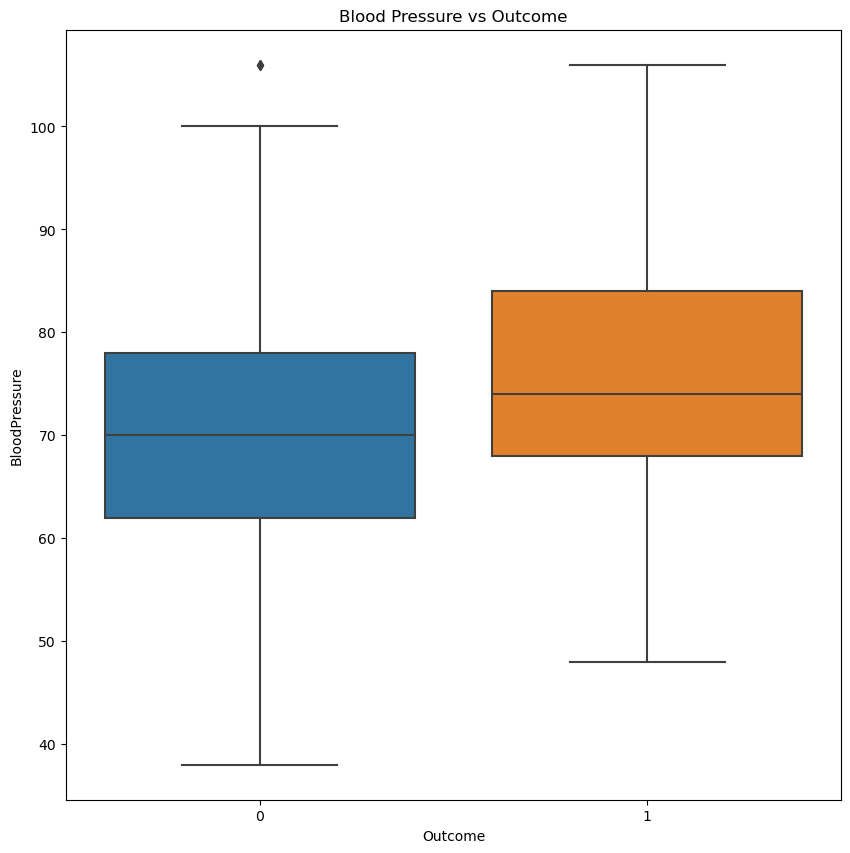

In [352]:
plt.figure(figsize=(10,10))
sns.boxplot(x=outcome, y=bloodPressure, data=df)
plt.title('Blood Pressure vs Outcome')
plt.show()

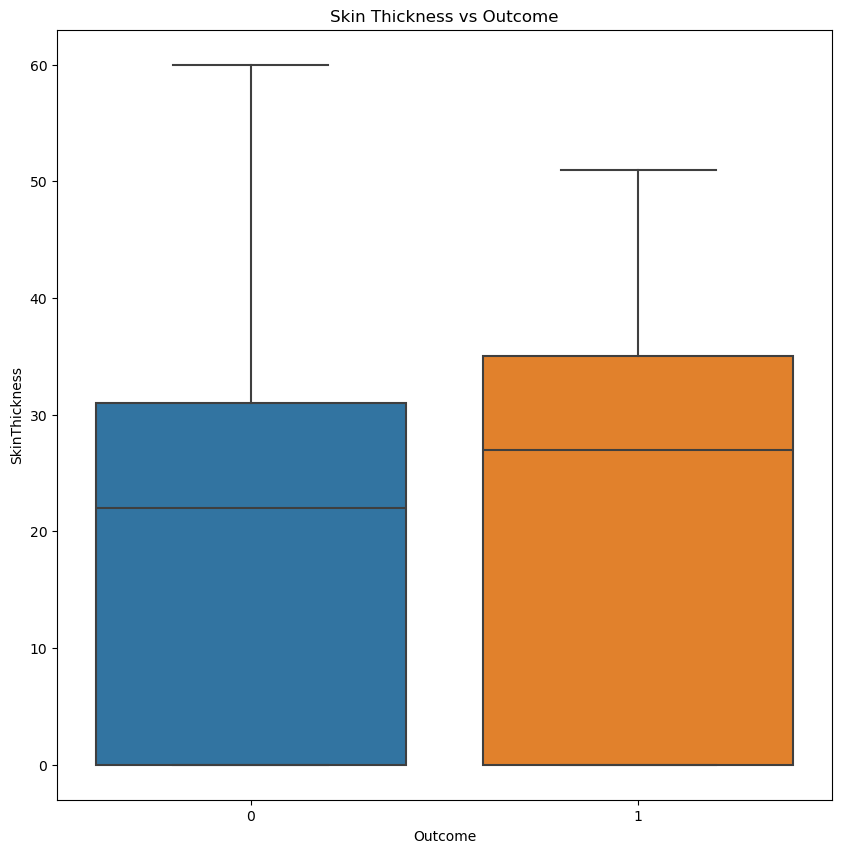

In [354]:
plt.figure(figsize=(10,10))
sns.boxplot(x=outcome, y=skinThickness, data=df)
plt.title('Skin Thickness vs Outcome')
plt.show()

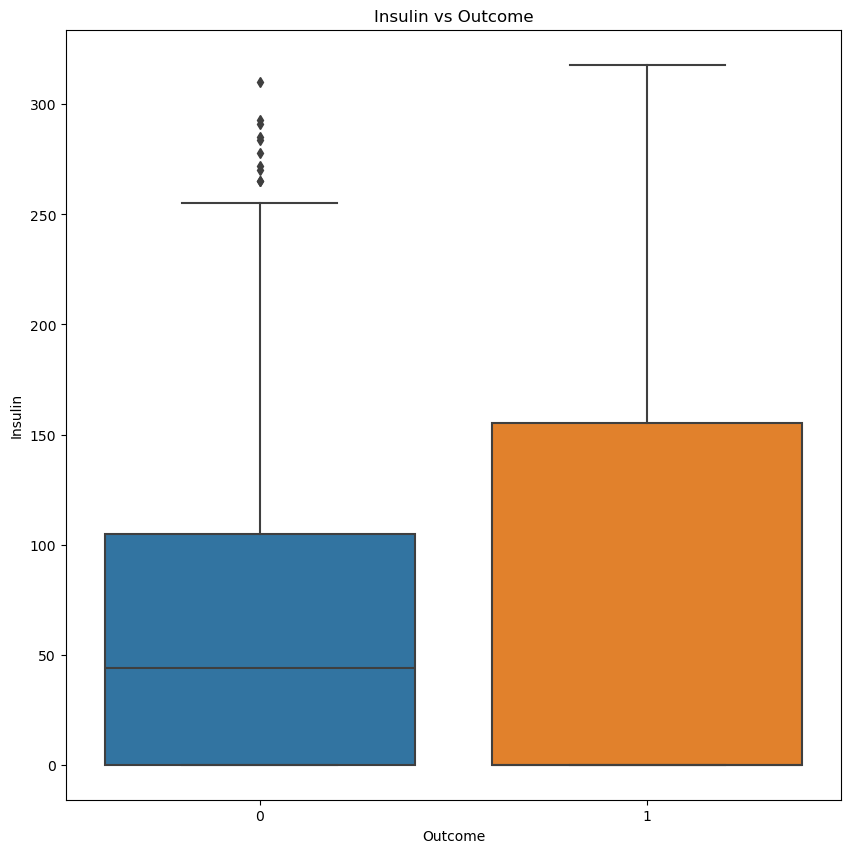

In [356]:
plt.figure(figsize=(10,10))
sns.boxplot(x=outcome, y=insulin, data=df)
plt.title('Insulin vs Outcome')
plt.show()

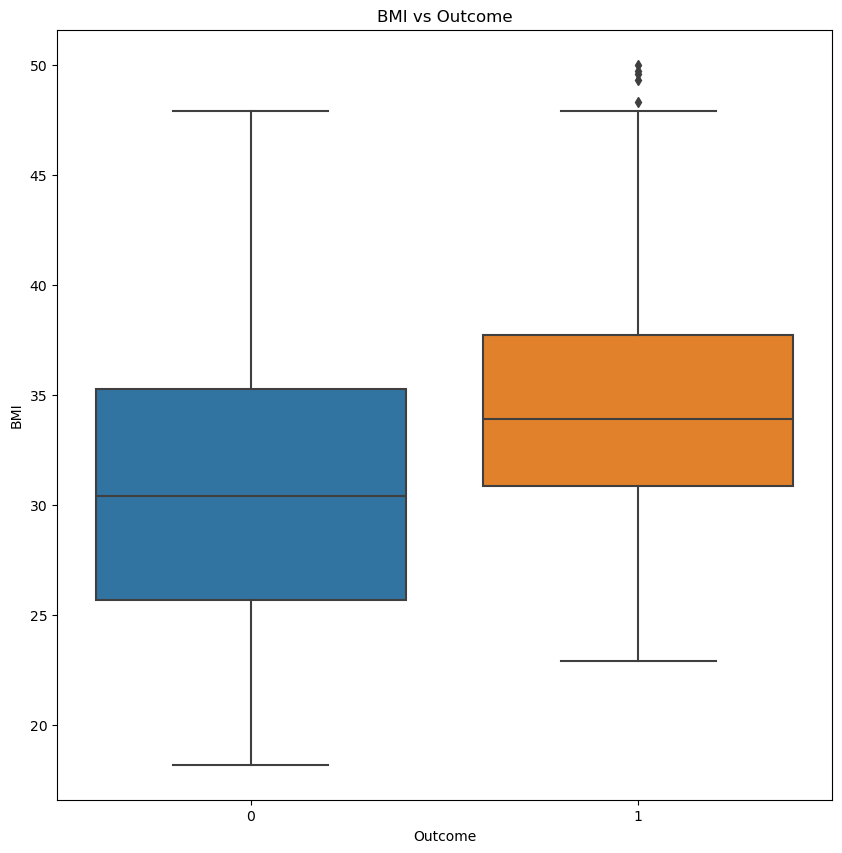

In [358]:
plt.figure(figsize=(10,10))
sns.boxplot(x=outcome, y=bmi, data=df)
plt.title('BMI vs Outcome')
plt.show()

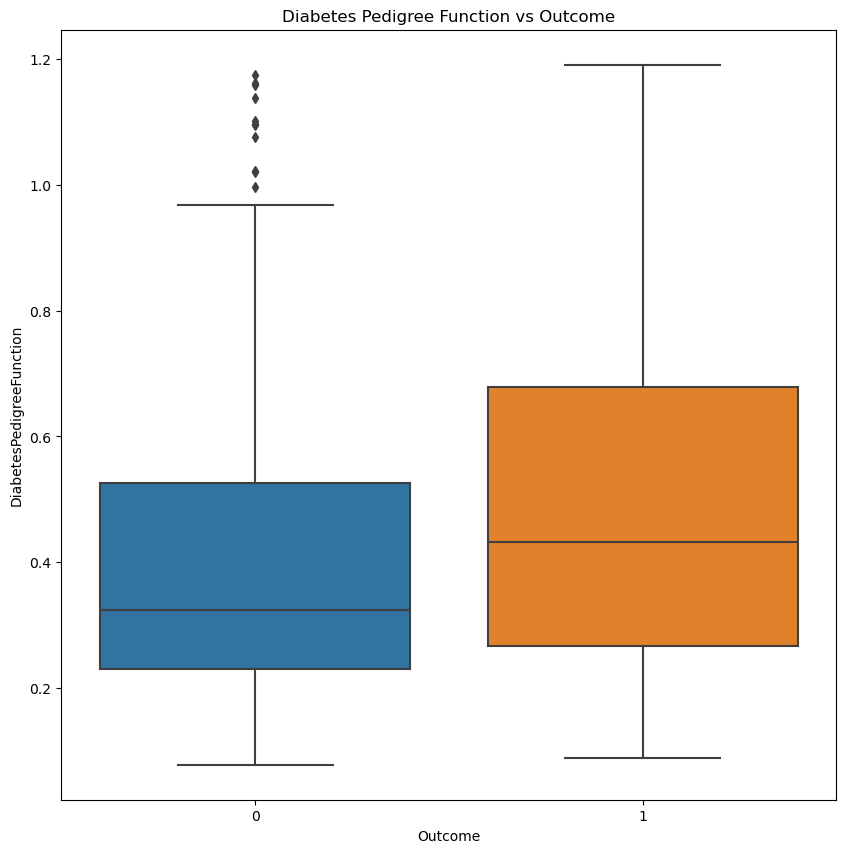

In [360]:
plt.figure(figsize=(10,10))
sns.boxplot(x=outcome, y=diabetesPedigreeFunction, data=df)
plt.title('Diabetes Pedigree Function vs Outcome')
plt.show()

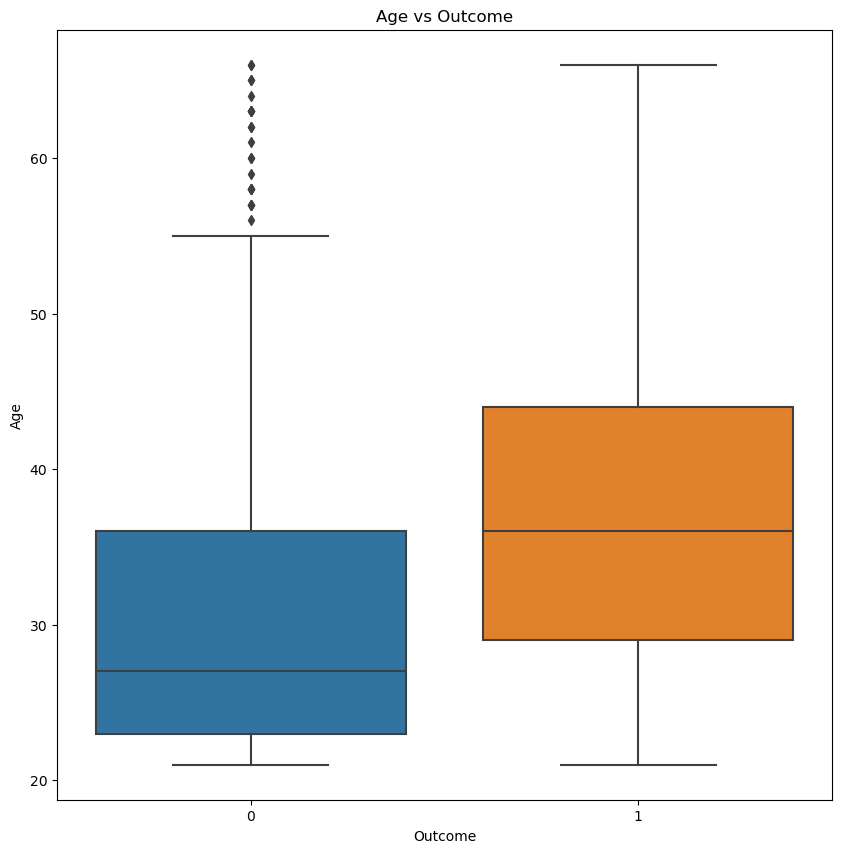

In [362]:
plt.figure(figsize=(10,10))
sns.boxplot(x=outcome, y=age, data=df)
plt.title('Age vs Outcome')
plt.show()

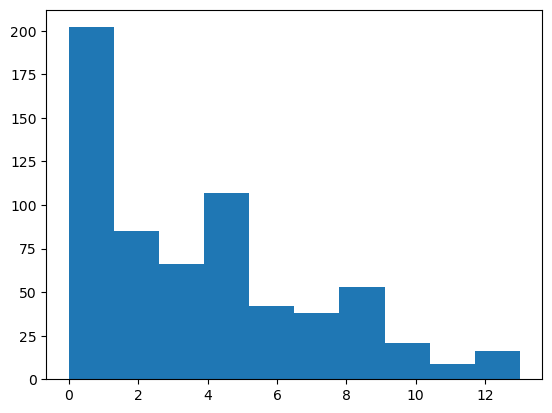

In [364]:
plt.hist(pregnancies)
plt.show() 

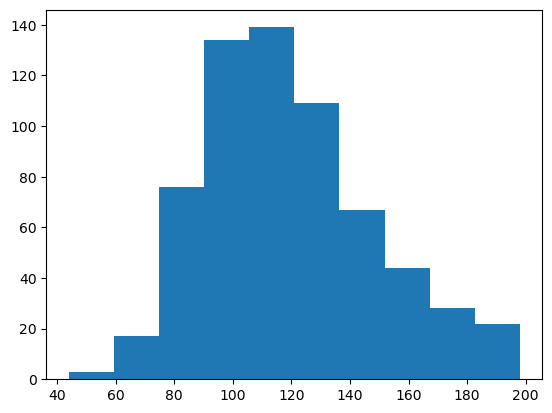

In [366]:
plt.hist(glucose)
plt.show() 

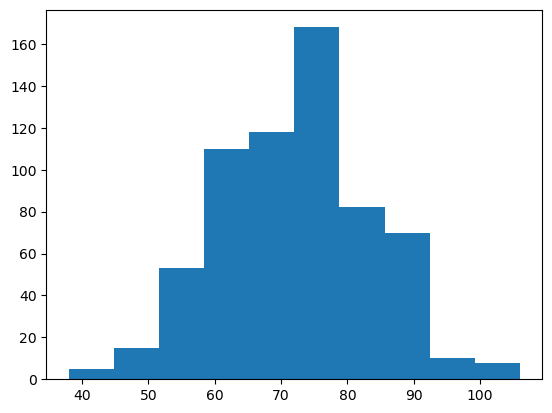

In [368]:
plt.hist(bloodPressure)
plt.show() 

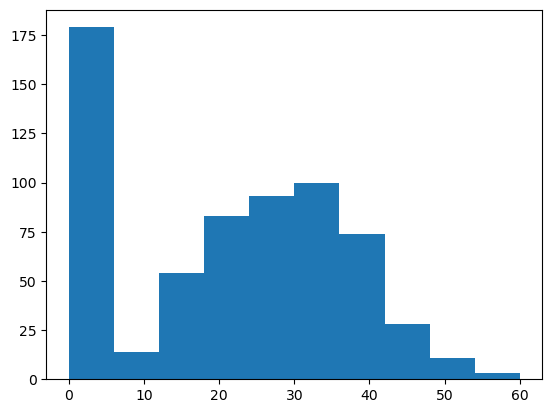

In [370]:
plt.hist(skinThickness)
plt.show() 

In [372]:
med_SkinThickness = df["SkinThickness"].median()
df['SkinThickness'] = np.where(df['SkinThickness'] == 0,
                                    med_SkinThickness, df['SkinThickness'])

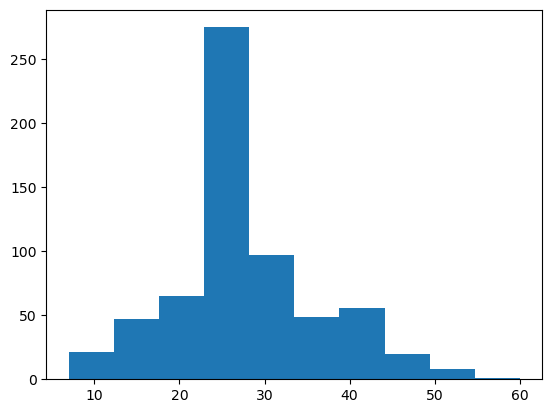

In [374]:
plt.hist(df['SkinThickness'])
plt.show() 

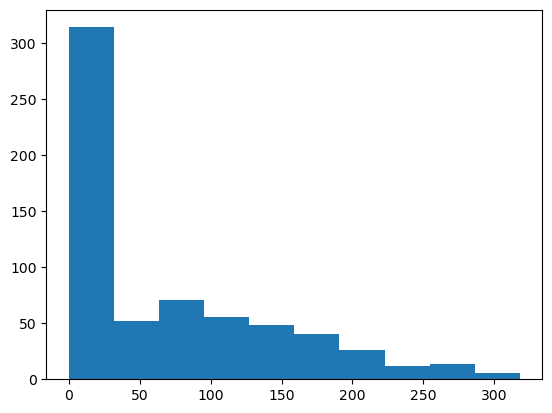

In [376]:
plt.hist(insulin)
plt.show() 

In [378]:
med_Insulin = df["Insulin"].median()
df['Insulin'] = np.where(df['Insulin'] == 0,
                                    med_Insulin, df['Insulin'])

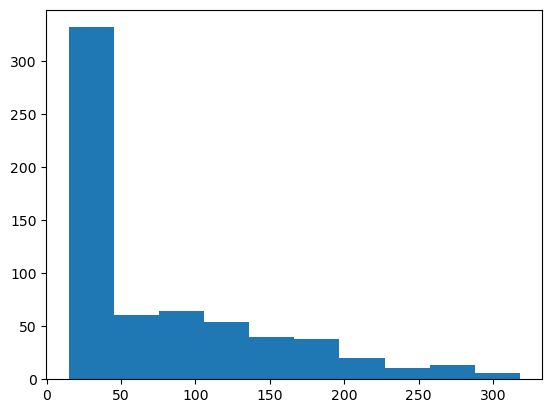

In [380]:
plt.hist(df['Insulin'])
plt.show() 

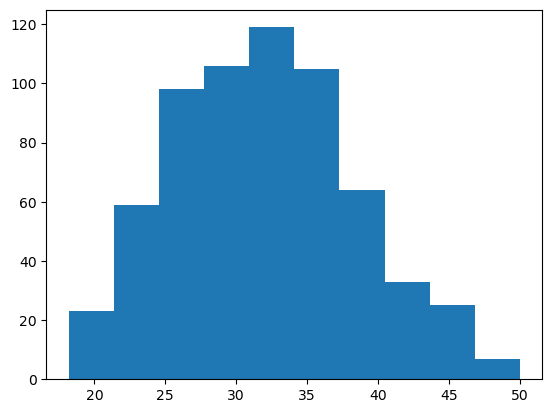

In [382]:
plt.hist(bmi)
plt.show()

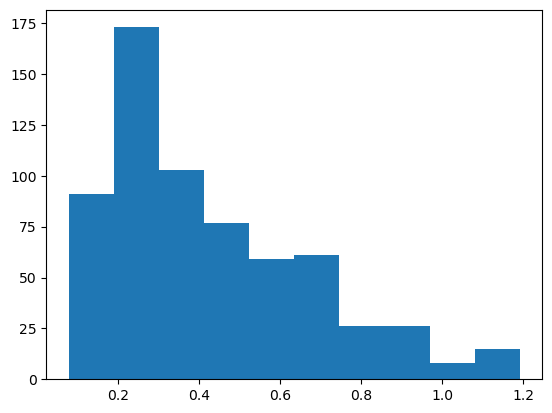

In [384]:
plt.hist(diabetesPedigreeFunction)
plt.show()

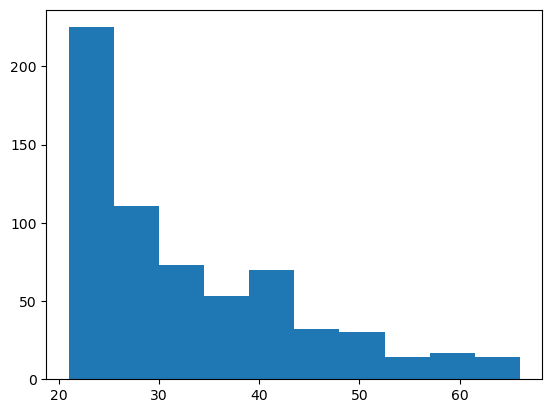

In [386]:
plt.hist(age)
plt.show()

In [388]:
# Split the data into features and target variable
X = df.drop('Outcome', axis=1)  # Replace 'target_column' with your target variable
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and y_train are your training data
# X_test and y_test are your testing data

In [390]:
# Standarization
scaler_ti = StandardScaler()
X_train[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = scaler_ti.fit_transform(X_train[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
X_test[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = scaler_ti.fit_transform(X_test[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])


In [392]:
#Single Perceptron
ppn_clf = Perceptron(eta0=0.001,max_iter=5000,random_state=1)
ppn_clf.fit(X_train,y_train.values.ravel())



Perceptron(eta0=0.001, max_iter=5000, random_state=1)

In [402]:
y_pred = ppn_clf.predict(X_test)
report = classification_report(y_test,y_pred, digits=4, target_names=["Not Diabetes", "Diabetes"])

In [408]:
ppn_acc = accuracy_score(y_test,y_pred)
ppn_precision = precision_score(y_test,y_pred)
ppn_sensitivity = sensitivity_score(y_test, y_pred, average='weighted')
ppn_f1 = f1_score(y_test,y_pred)
print("Report",report)
print("Accuracy: ", np.round(ppn_acc,2))
print("Precision: ", np.round(ppn_precision,2))
print("Sensitivity: ", np.round(ppn_sensitivity,2))
print("F1_Score: ", np.round(ppn_f1,2))

Report               precision    recall  f1-score   support

Not Diabetes     0.8556    0.8370    0.8462        92
    Diabetes     0.6053    0.6389    0.6216        36

    accuracy                         0.7812       128
   macro avg     0.7304    0.7379    0.7339       128
weighted avg     0.7852    0.7812    0.7830       128

Accuracy:  0.78
Precision:  0.61
Sensitivity:  0.78
F1_Score:  0.62


In [416]:
#Multiple Layer Perceptron (MLP)
mlp_clf = MLPClassifier(solver="adam", max_iter=5000, activation="relu",
                        hidden_layer_sizes= (12),
                        alpha = 0.01,
                        batch_size = 64,
                        learning_rate_init = 0.001,
                        random_state=2)
mlp_clf.fit(X_train,y_train.values.ravel())

MLPClassifier(alpha=0.01, batch_size=64, hidden_layer_sizes=12, max_iter=5000,
              random_state=2)

In [420]:
y_pred = mlp_clf.predict(X_test)
report = classification_report(y_test,y_pred, digits=4, target_names=["Not Diabetes", "Diabetes"])

In [422]:
#Print report and accuracy of Multiple Layer Perceptron
mlp_acc = accuracy_score(y_test,y_pred)
mlp_precision = precision_score(y_test,y_pred)
mlp_sensitivity = sensitivity_score(y_test, y_pred, average='weighted')
mlp_f1 = f1_score(y_test,y_pred)
print("Report",report)
print("Accuracy: ", np.round(mlp_acc,2))
print("Precision: ", np.round(mlp_precision,2))
print("Sensitivity: ", np.round(mlp_sensitivity,2))
print("F1_Score: ", np.round(mlp_f1, 2))

Report               precision    recall  f1-score   support

Not Diabetes     0.8632    0.8913    0.8770        92
    Diabetes     0.6970    0.6389    0.6667        36

    accuracy                         0.8203       128
   macro avg     0.7801    0.7651    0.7718       128
weighted avg     0.8164    0.8203    0.8178       128

Accuracy:  0.82
Precision:  0.7
Sensitivity:  0.82
F1_Score:  0.67
